In [12]:
import inline
import matplotlib
import matplotlib.pyplot as plt
import pymongo
import pandas as pd
import numpy as np
% matplotlib inline
plt.style.use('ggplot')

# 解决matplotlib显示中文问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

client = pymongo.MongoClient('192.168.159.128')

db = client['zhilian']
table = db['测试经理']

columns =  ['zwmc',
           'gsmc',
           'zwyx',
           'gbsj',
           'gzdd',
           'fkl',
           'brief',
           'zw_link',
           '_id',
           'save_date']

df = pd.DataFrame([records for records in table.find()], columns=columns)

print('总行数为：{}行'.format(df.shape[0]))
df.head(2)

总行数为：6601行


,zwmc,gsmc,zwyx,gbsj,gzdd,fkl,brief,zw_link,_id,save_date
0,高级测试经理,上海数享信息技术有限公司,20000-30000,最新,上海,100%,岗位职责： 1，制定测试规范，搭建测试质量管理体系，组织完成测试计划，分配测试任务； ...,http://jobs.zhaopin.com/388780686250204.htm,582946f967e0dfe2801a1685,2018-01-06
1,测试经理,北京简单科技有限公司,20001-30000,最新,北京,,1、管理测试团队； 2、负责系统的基本功能自动化测试工作，编写自动化测试脚本； 3、提...,http://jobs.zhaopin.com/147164943250898.htm,582946f967e0dfe2801a1687,2018-01-06


In [2]:
df['save_date'] = pd.to_datetime(df['save_date'])
print(df['save_date'].dtype)

datetime64[ns]


In [3]:
df_clean = df[['zwmc',
           'gsmc',
           'zwyx',
           'gbsj',
           'gzdd',
           'fkl',
           'brief',
           'zw_link',
           'save_date']]

# 对月薪的数据进行筛选，选取格式为“XXXX-XXXX”的信息，方面后续分析
df_clean = df_clean[df_clean['zwyx'].str.contains('\d+-\d+', regex=True)]
print('总行数为：{}行'.format(df_clean.shape[0]))

总行数为：6434行


In [4]:
s_min,s_max = df_clean.loc[:,'zwyx'].str.split('-',1).str
df_min = pd.DataFrame(s_min)
df_min.columns = ['zwyx_min']
df_max = pd.DataFrame(s_max)
df_max.columns = ['zwyx_max']

df_clean_concat = pd.concat([df_clean,df_min,df_max],axis=1)
df_clean_concat['zwyx_min'] = pd.to_numeric(df_clean_concat['zwyx_min'])
df_clean_concat['zwyx_max'] = pd.to_numeric(df_clean_concat['zwyx_max'])
print(df_clean_concat.dtypes)
df_clean_concat.head(2)

zwmc                 object
gsmc                 object
zwyx                 object
gbsj                 object
gzdd                 object
fkl                  object
brief                object
zw_link              object
save_date    datetime64[ns]
zwyx_min              int64
zwyx_max              int64
dtype: object


,zwmc,gsmc,zwyx,gbsj,gzdd,fkl,brief,zw_link,save_date,zwyx_min,zwyx_max
0,高级测试经理,上海数享信息技术有限公司,20000-30000,最新,上海,100%,岗位职责： 1，制定测试规范，搭建测试质量管理体系，组织完成测试计划，分配测试任务； ...,http://jobs.zhaopin.com/388780686250204.htm,2018-01-06,20000,30000
1,测试经理,北京简单科技有限公司,20001-30000,最新,北京,,1、管理测试团队； 2、负责系统的基本功能自动化测试工作，编写自动化测试脚本； 3、提...,http://jobs.zhaopin.com/147164943250898.htm,2018-01-06,20001,30000


In [6]:
df_clean_concat.sort_values('zwyx_min',inplace=True)

In [7]:
print(df_clean_concat[df_clean_concat.duplicated('zw_link')==True])

Empty DataFrame
Columns: [zwmc, gsmc, zwyx, gbsj, gzdd, fkl, brief, zw_link, save_date, zwyx_min, zwyx_max]
Index: []


In [8]:
ADDRESS = [ '北京', '上海', '广州', '深圳',
           '天津', '武汉', '西安', '成都', '大连',
           '长春', '沈阳', '南京', '济南', '青岛',
           '杭州', '苏州', '无锡', '宁波', '重庆',
           '郑州', '长沙', '福州', '厦门', '哈尔滨',
           '石家庄', '合肥', '惠州', '太原', '昆明',
           '烟台', '佛山', '南昌', '贵阳', '南宁']
df_city = df_clean_concat.copy()
# 由于工作地点的写上，比如北京，包含许多地址为北京-朝阳区等
# 可以用替换的方式进行整理，这里用pandas的replace()方法
for city in ADDRESS:
    df_city['gzdd'] = df_city['gzdd'].replace([(city+'.*')],[city],regex=True)
    
# 针对全国主要城市进行分析
df_city_main = df_city[df_city['gzdd'].isin(ADDRESS)]
    
df_city_main_count = df_city_main.groupby('gzdd')['zwmc','gsmc'].count()
df_city_main_count['gsmc'] = df_city_main_count['gsmc']/(df_city_main_count['gsmc'].sum())
df_city_main_count.columns = ['number','percentage']
    
# 按职位数量进行排序
df_city_main_count.sort_values(by='number',ascending=False,inplace=True)
# 添加辅助列，标注城市和百分比，方面在后续绘图时使用
df_city_main_count['label'] = df_city_main_count.index+''+((df_city_main_count['percentage']*100).round()).astype('int').astype('str')+'%'
print(type(df_city_main_count))
# 职位数量最多的Top10城市的列表
print(df_city_main_count.head(10))

<class 'pandas.core.frame.DataFrame'>
      number  percentage  label
gzdd                           
北京       665    0.126667  北京13%
上海       604    0.115048  上海12%
深圳       399    0.076000   深圳8%
南京       338    0.064381   南京6%
西安       268    0.051048   西安5%
广州       266    0.050667   广州5%
成都       263    0.050095   成都5%
武汉       245    0.046667   武汉5%
杭州       238    0.045333   杭州5%
苏州       185    0.035238   苏州4%


ValueError: Format "jpg" is not supported.
Supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz.

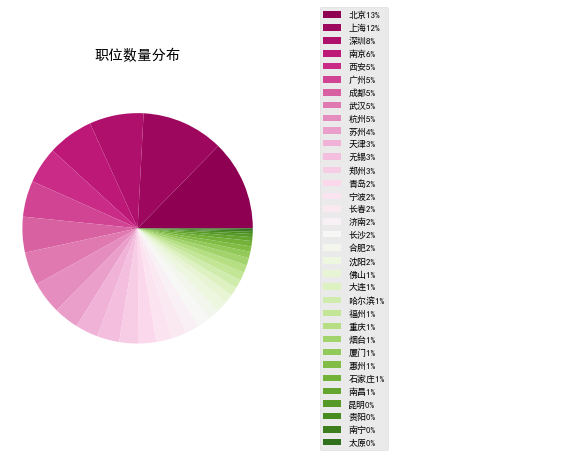

In [13]:
from  matplotlib import cm
import numpy as np
label = df_city_main_count['label']
sizes = df_city_main_count['number']

# 设置绘图区域大小
fig, axes = plt.subplots(figsize=(10,6),ncols=2)
ax1, ax2 = axes.ravel()

colors = cm.PiYG(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks

# 由于城市数量太多，饼图中不显示labels和百分比
patches, texts = ax1.pie(sizes,labels=None, shadow=False, startangle=0, colors=colors)

ax1.axis('equal')  

ax1.set_title('职位数量分布', loc='center')

# ax2 只显示图例（legend）
ax2.axis('off')
ax2.legend(patches, label, loc='center left', fontsize=9)

plt.savefig('job_distribute.jpg')
plt.show()

NameError: name 'xy' is not defined

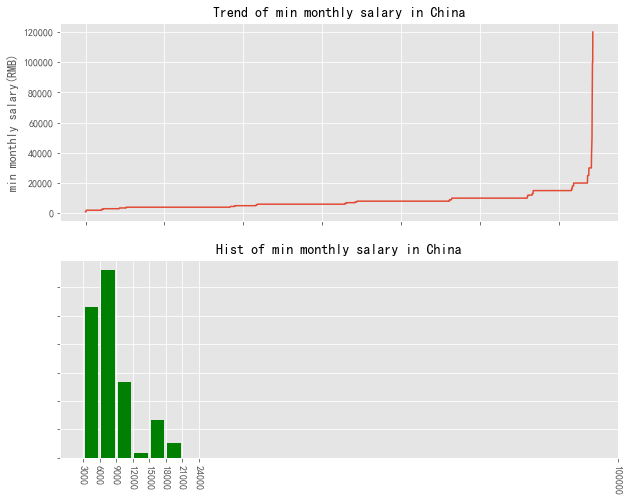

In [14]:
from matplotlib.ticker import FormatStrFormatter
fig,(ax1,ax2) = plt.subplots(figsize=(10,8),nrows = 2)

x_pos = list(range(df_clean_concat.shape[0]))
y1 = df_clean_concat['zwyx_min']

ax1.plot(x_pos,y1)
ax1.set_title('Trend of min monthly salary in China', size=14)
ax1.set_xticklabels('')
ax1.set_ylabel('min monthly salary(RMB)')

bins =  [3000,6000, 9000, 12000, 15000, 18000, 21000, 24000, 100000]

counts,bins,patches = ax2.hist(y1,bins,normed=1,histtype='bar',facecolor='g', rwidth=0.8)
ax2.set_title('Hist of min monthly salary in China', size=14)
ax2.set_yticklabels('')

ax2.set_xticks(bins)  #将bins设置为xticks
ax2.set_xticklabels(bins,rotation=-90) # 设置为xticklabels的方向

bin_centers = 0.5*np.diff(bins) + bins[:-1]
for count,x in zip(counts,bin_centers):
    percent = '%0.0f%%' %(100*float(count)/counts.sum())
    ax2.annotate(percent,xy(x,0),xycoords('data','axes fraction'),
        xytext=(0, -40), textcoords='offset points', va='top', ha='center', rotation=-90, color='b', size=14)

fig.savefig('salary_quanguo_min.jpg')

ValueError: Format "jpg" is not supported.
Supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz.

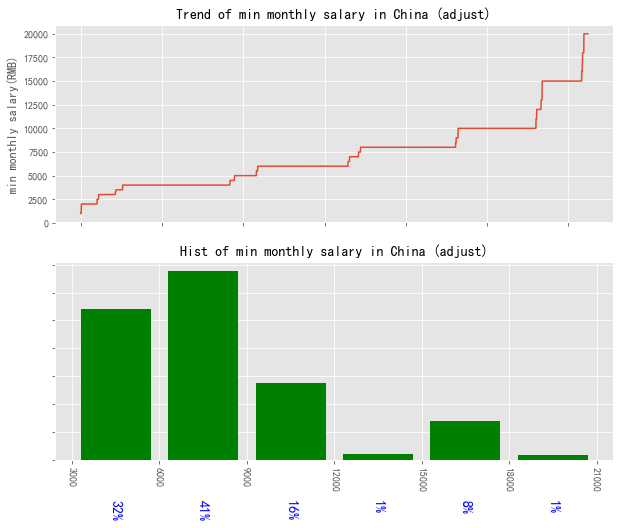

In [15]:
df_zwyx_adjust = df_clean_concat[df_clean_concat['zwyx_min']<=20000]

fig, (ax1, ax2) = plt.subplots(figsize=(10,8), nrows=2)

x_pos = list(range(df_zwyx_adjust.shape[0]))
y1 = df_zwyx_adjust['zwyx_min']

ax1.plot(x_pos, y1)
ax1.set_title('Trend of min monthly salary in China (adjust)', size=14)
ax1.set_xticklabels('')
ax1.set_ylabel('min monthly salary(RMB)')

bins = [3000,6000, 9000, 12000, 15000, 18000, 21000]
counts, bins, patches = ax2.hist(y1, bins, normed=1, histtype='bar', facecolor='g', rwidth=0.8)
ax2.set_title('Hist of min monthly salary in China (adjust)', size=14)
ax2.set_yticklabels('')
# ax2.set_xlabel('min monthly salary(RMB)')

# http://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
ax2.set_xticks(bins) #将bins设置为xticks
ax2.set_xticklabels(bins, rotation=-90) # 设置为xticklabels的方向

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
#     # Label the raw counts
#     ax2.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -70), textcoords='offset points', va='top', ha='center', rotation=-90)

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax2.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), textcoords='offset points', va='top', ha='center', rotation=-90, color='b', size=14)

fig.savefig('salary_quanguo_min_adjust.jpg')

In [1]:
brief_list = list(df_clean_concat['brief'])
brief_str = ''.join(brief_list)
print(type(brief_str))
print(brief_str)
with open('brief_quanguo.txt', 'w', encoding='utf-8') as f:
     f.write(brief_str)

NameError: name 'df_clean_concat' is not defined

In [5]:
import jieba
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import os
import PIL.Image as Image
import numpy as np


with open('brief_quanguo.txt', 'rb') as f: # 读取文件内容
    text = f.read()
    f.close()


# 首先使用 jieba 中文分词工具进行分词
wordlist = jieba.cut(text, cut_all=False)      
# cut_all, True为全模式，False为精确模式

wordlist_space_split = ' '.join(wordlist)

d = os.path.dirname(__file__)
alice_coloring = np.array(Image.open(os.path.join(d,'colors.png')))
my_wordcloud = WordCloud(background_color='#F0F8FF', max_words=100, mask=alice_coloring,
                         max_font_size=300, random_state=42).generate(wordlist_space_split)
image_colors = ImageColorGenerator(alice_coloring)

plt.show(my_wordcloud.recolor(color_func=image_colors))
plt.imshow(my_wordcloud)            # 以图片的形式显示词云
plt.axis('off')                     # 关闭坐标轴
plt.show()

my_wordcloud.to_file(os.path.join(d, 'brief_quanguo_colors_cloud.png'))

NameError: name '__file__' is not defined